# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.applications import ResNet50, EfficientNetB0, VGG16, InceptionV3, DenseNet121
from keras.layers import Dense, Input, GlobalAveragePooling2D, BatchNormalization,  Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Model
from keras import backend as K

# GPU usage threshold

In [2]:
gpu_opts = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_opts))

# Medical image dataset loading into dataframe

In [3]:
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"
val_dir = "chest_xray/val"

print("Train set:\n")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")
print("***********************************************")
print("Test set:\n")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")
print("***********************************************")
print("Validation set:\n")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")



Train set:

PNEUMONIA=3875
NORMAL=1341
***********************************************
Test set:

PNEUMONIA=390
NORMAL=234
***********************************************
Validation set:

PNEUMONIA=8
NORMAL=8


# EDA

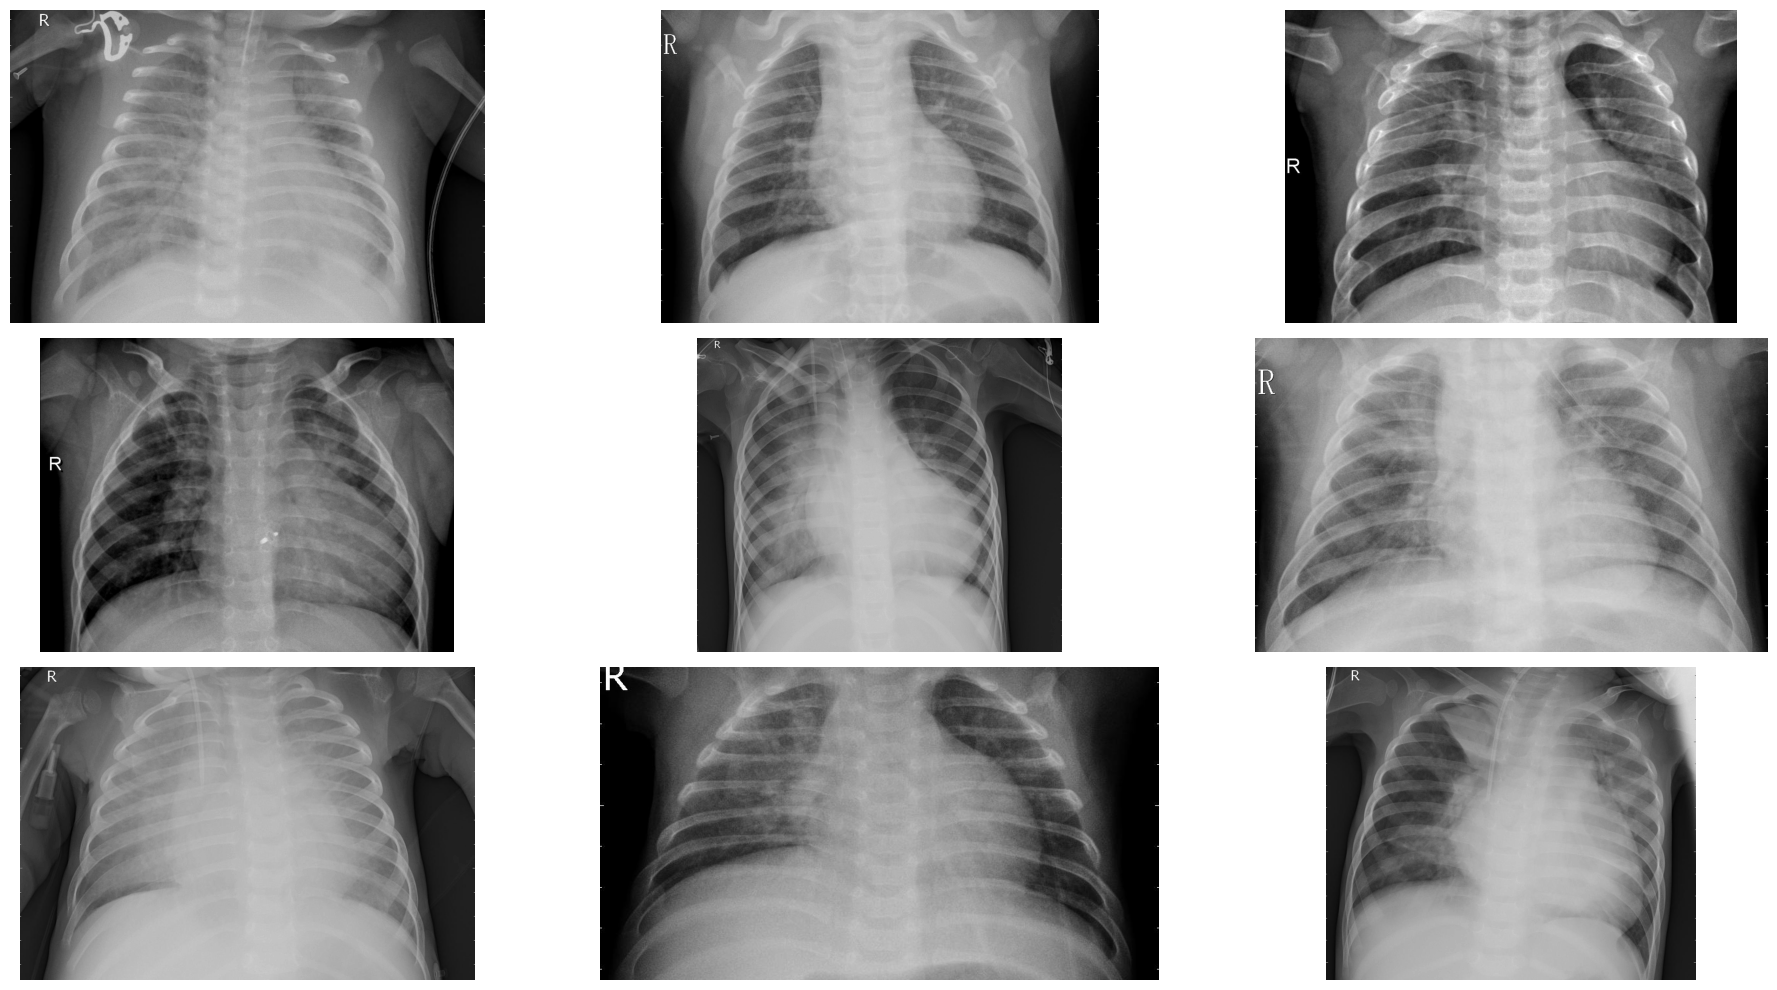

In [4]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

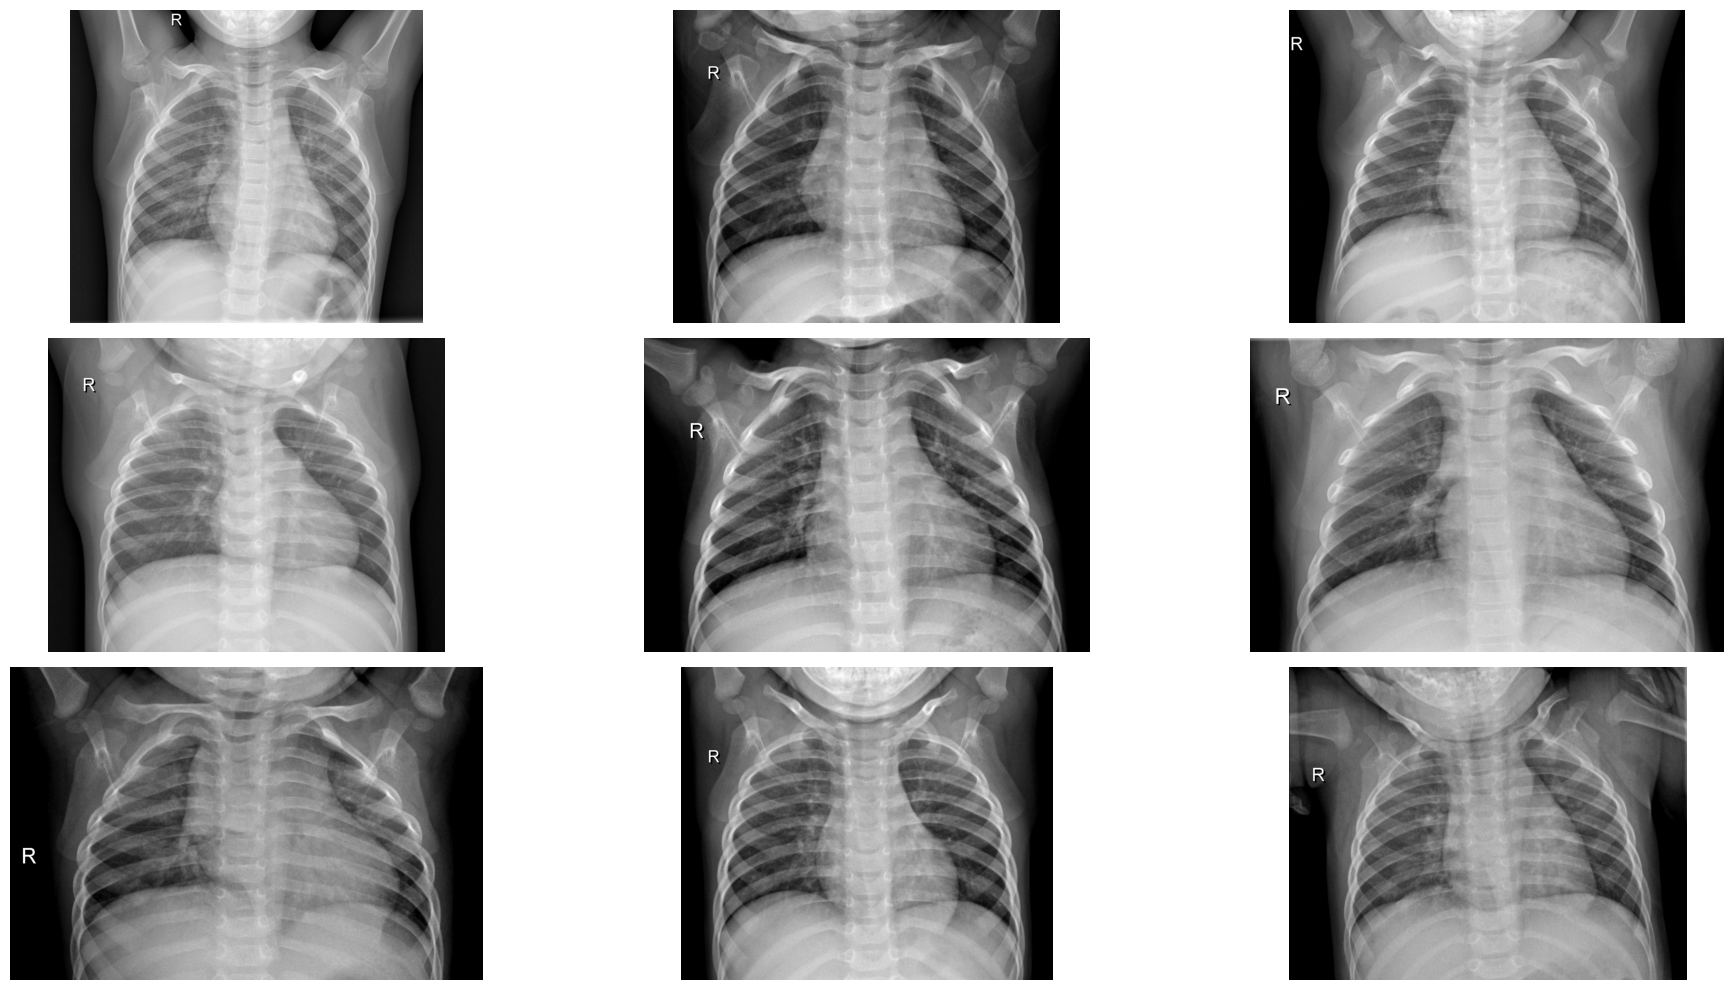

In [5]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

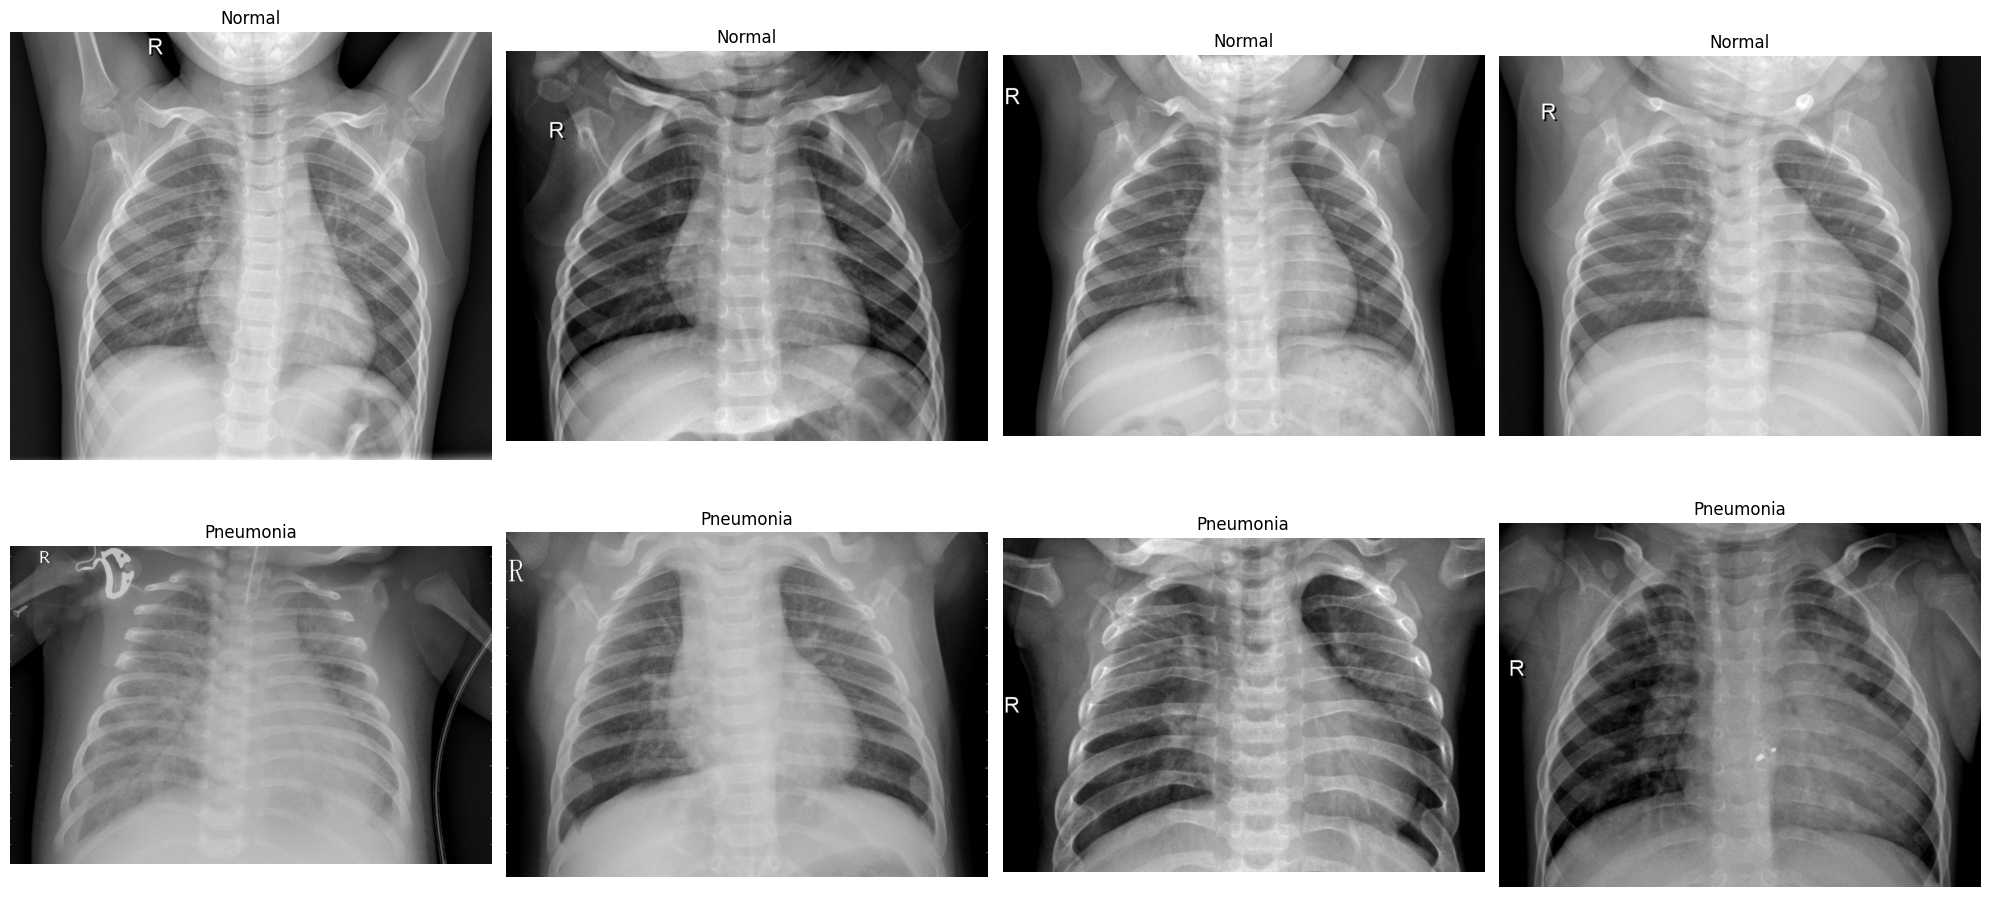

In [6]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(4):
    plt.subplot(2, 4, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Normal')

for i in range(4):
    plt.subplot(2, 4, i + 5)  # Start the index from 5 for the second row
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Pneumonia')

plt.tight_layout()


plt.show()


The dimensions of the image are 1152 pixels width and 1422 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 100.6506 and the standard deviation is 59.8083


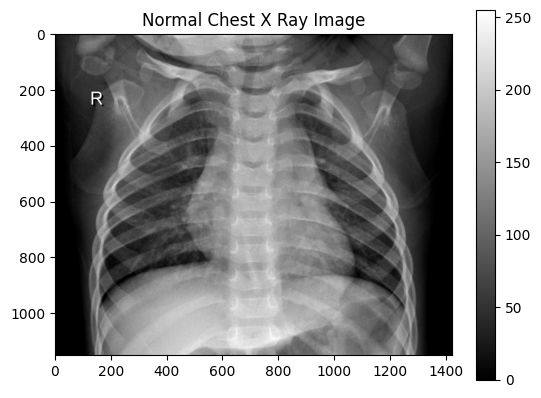

In [7]:
normal_img = os.listdir("chest_xray/train/NORMAL")[1]
normal_dir = "chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Normal Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

C:\Users\Ayush\AppData\Local\Temp\ipykernel_7228\2657743745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

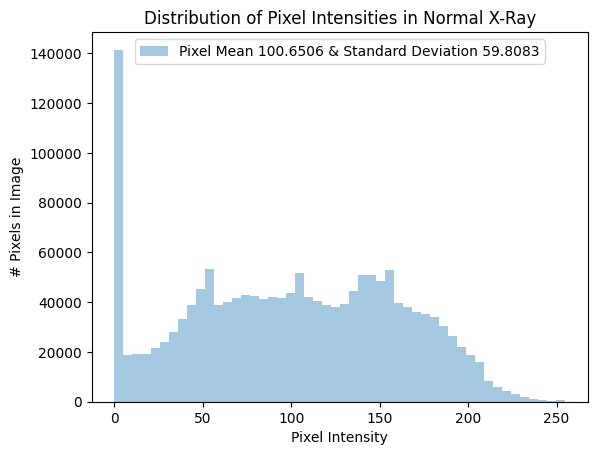

In [8]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in Normal X-Ray')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

The dimensions of the image are 768 pixels width and 1072 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 127.3646 and the standard deviation is 57.4101


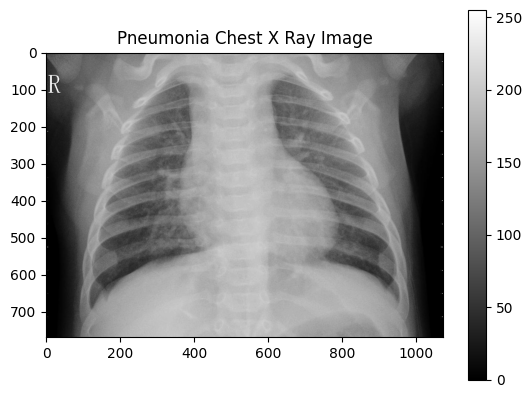

In [9]:
normal_img = os.listdir("chest_xray/train/PNEUMONIA")[1]
normal_dir = "chest_xray/train/PNEUMONIA"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Pneumonia Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

C:\Users\Ayush\AppData\Local\Temp\ipykernel_7228\1301073924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

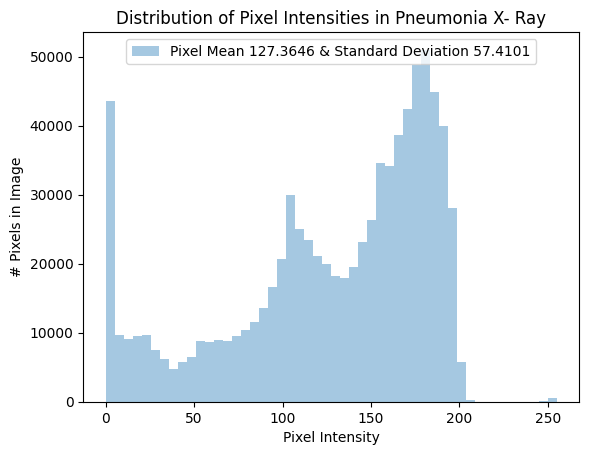

In [10]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in Pneumonia X- Ray')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [11]:

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


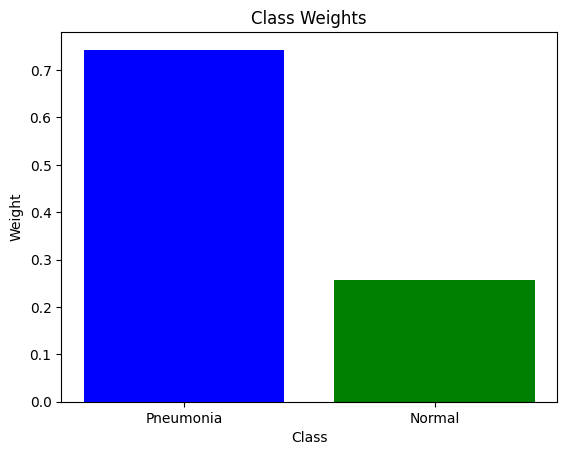

In [12]:
labels = ['Pneumonia', 'Normal']
weights = [weight_for_0, weight_for_1]

plt.bar(labels, weights, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Class Weights')
plt.show()

# Data Preprocessing

In [13]:
image_generator = ImageDataGenerator()

train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180),
                                            seed=42)

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=True, 
                                                class_mode='binary',
                                                target_size=(180, 180),
                                                 seed=42)

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180),
                                            seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


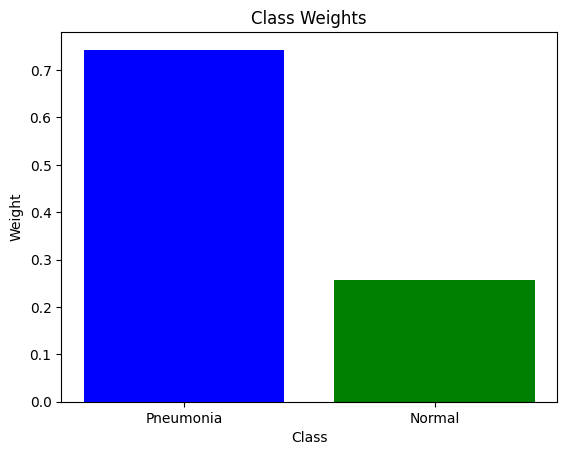

In [14]:
labels = ['Pneumonia', 'Normal']
weights = [weight_for_0, weight_for_1]

plt.bar(labels, weights, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Class Weights')
plt.show()

# Model Implementation

## Resnet50

In [15]:
resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

In [16]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [17]:
  resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)


In [18]:
r = resnet_model.fit(train,
          epochs=15,
          validation_data=validation,
          class_weight=class_weight)

Epoch 1/15
652/652 [==============================] - 156s 222ms/step - loss: 0.1667 - accuracy: 0.8173 - precision: 0.9425 - recall: 0.8031 - val_loss: 1.0287 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/15
652/652 [==============================] - 143s 219ms/step - loss: 0.1190 - accuracy: 0.8738 - precision: 0.9664 - recall: 0.8601 - val_loss: 1.3031 - val_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 3/15
652/652 [==============================] - 143s 220ms/step - loss: 0.1016 - accuracy: 0.8907 - precision: 0.9691 - recall: 0.8810 - val_loss: 2.7295 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/15
652/652 [==============================] - 144s 220ms/step - loss: 0.0985 - accuracy: 0.8934 - precision: 0.9721 - recall: 0.8818 - val_loss: 0.6929 - val_accuracy: 0.6875 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 5/15
652/652 [==============================] - 144s 220ms/step - loss: 0.0920 - a

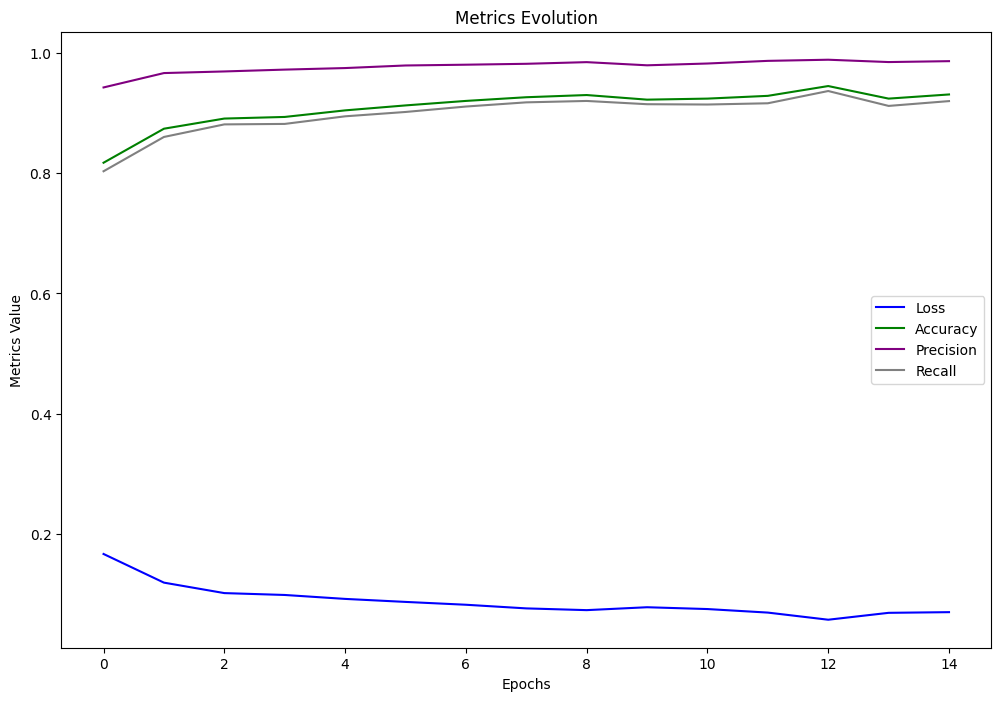

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(r.history['loss'], label='Loss', color='blue')

plt.plot(r.history['accuracy'], label='Accuracy', color='green')



plt.plot(r.history['precision'], label='Precision', color='purple')



plt.plot(r.history['recall'], label='Recall', color='gray')


plt.legend()
plt.title('Metrics Evolution')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()


In [20]:
restest =resnet_model.evaluate(test)
rtesta=restest[1] * 100
rtestp=restest[2] * 100 
rtestr=restest[3] * 100 
rtestl=restest[0] 
print("Test Accuracy:", rtesta,"%")
print("Precision:", rtestp,"%")
print("Recall:", rtestr,"%")
print("Loss Value:", rtestl)

restrain = resnet_model.evaluate(train)
rtraina=restrain[1] * 100
rtrainp=restrain[2] * 100 
rtrainr=restrain[3] * 100 
rtrainl=restrain[0]
print("Train Accuracy:", rtraina,"%")
print("Precision:", rtrainp,"%")
print("Recall:", rtrainr,"%")
print("Loss Value:", rtrainl)

78/78 [==============================] - 6s 75ms/step - loss: 0.5569 - accuracy: 0.7981 - precision: 0.7672 - recall: 0.9718
Test Accuracy: 79.80769276618958 %
Precision: 76.72064900398254 %
Recall: 97.1794843673706 %
Loss Value: 0.5569069385528564
652/652 [==============================] - 52s 79ms/step - loss: 0.1453 - accuracy: 0.9496 - precision: 0.9908 - recall: 0.9409
Train Accuracy: 94.95782256126404 %
Precision: 99.0760862827301 %
Recall: 94.09032464027405 %
Loss Value: 0.14532406628131866


Dice Score is  0.8574660600881672


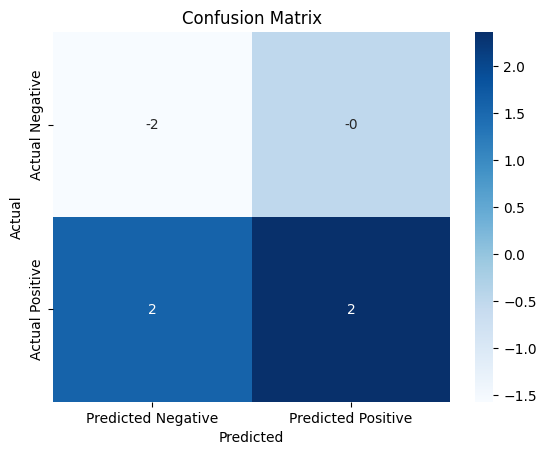

In [21]:
accuracy = restest[1]
recall =restest[3]
precision =restest[2]


tp = recall * (accuracy + 1) / (precision + recall - 1)
fp = precision * (accuracy + 1) / (precision + recall - 1) - tp
tn = accuracy - tp
fn = 1 - recall - tn
conf_matrix = [[tn, fp],
               [fn, tp]]
f1_scorer = 2 * (precision * recall) / (precision + recall)
print('Dice Score is ',f1_scorer)
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

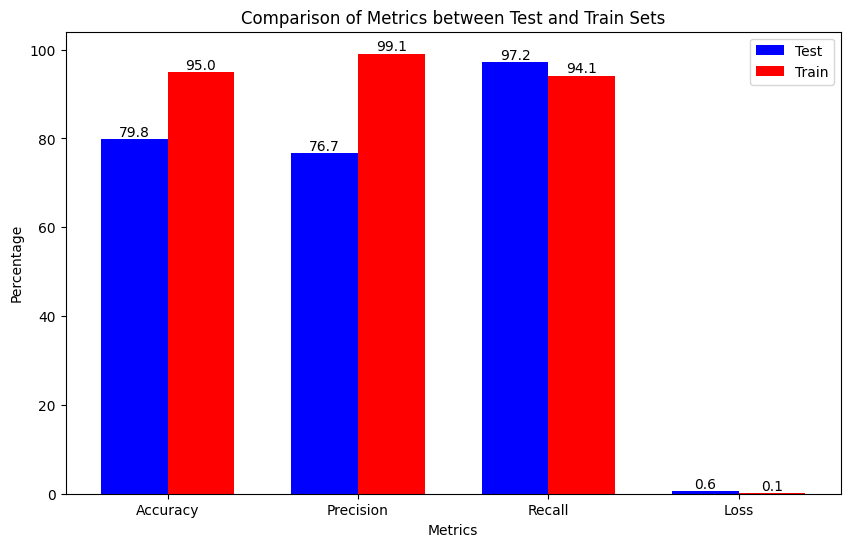

In [22]:
metrics = ['Accuracy', 'Precision', 'Recall', 'Loss']
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [rtesta, rtestp, rtestr, rtestl], width, label='Test', color='b')
rects2 = ax.bar(x + width/2, [rtraina, rtrainp, rtrainr, rtrainl], width, label='Train', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Metrics between Test and Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')


plt.show()

In [23]:
K.clear_session()

## EfficientNetB0

In [24]:
model = EfficientNetB0(input_shape=(180, 180, 3), include_top=False, weights='imagenet')
model.summary()


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 180, 180, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['normalization[0][0

In [25]:
  eff_model = tf.keras.Sequential([
        model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
eff_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)


In [26]:
e = eff_model.fit(train,
          epochs=15,
          validation_data=validation,
          class_weight=class_weight)

Epoch 1/15
652/652 [==============================] - 120s 166ms/step - loss: 0.1297 - accuracy: 0.8501 - precision: 0.9569 - recall: 0.8359 - val_loss: 0.2093 - val_accuracy: 0.9375 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 2/15
652/652 [==============================] - 107s 163ms/step - loss: 0.1000 - accuracy: 0.8957 - precision: 0.9703 - recall: 0.8867 - val_loss: 0.9688 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/15
652/652 [==============================] - 106s 163ms/step - loss: 0.0794 - accuracy: 0.9201 - precision: 0.9795 - recall: 0.9115 - val_loss: 1.6421 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/15
652/652 [==============================] - 106s 163ms/step - loss: 0.0736 - accuracy: 0.9199 - precision: 0.9830 - recall: 0.9079 - val_loss: 0.0581 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/15
652/652 [==============================] - 107s 163ms/step - loss: 0.0601 - a

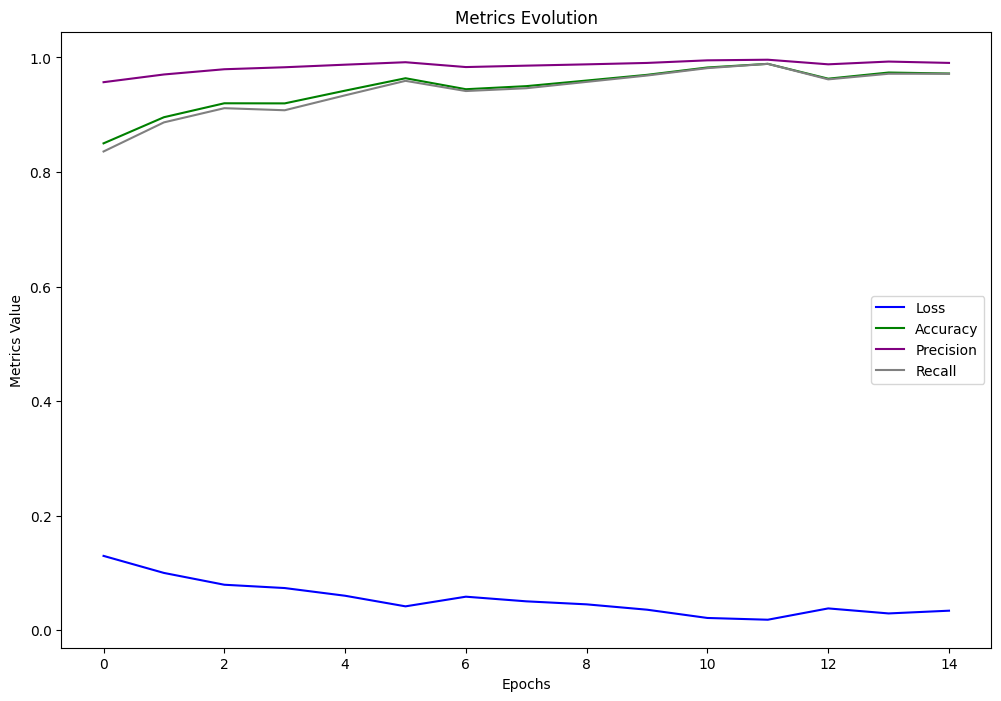

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(e.history['loss'], label='Loss', color='blue')


plt.plot(e.history['accuracy'], label='Accuracy', color='green')


plt.plot(e.history['precision'], label='Precision', color='purple')


plt.plot(e.history['recall'], label='Recall', color='gray')


plt.legend()
plt.title('Metrics Evolution')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()


In [28]:
efftest =eff_model.evaluate(test)



etesta=efftest[1] * 100
etestp=efftest[2] * 100 
etestr=efftest[3] * 100 
etestl=efftest[0] 
print("Test Accuracy:", etesta,"%")
print("Precision:", etestp,"%")
print("Recall:", etestr,"%")
print("Loss Value:", etestl)

efftrain = eff_model.evaluate(train)
etraina=efftrain[1] * 100
etrainp=efftrain[2] * 100 
etrainr=efftrain[3] * 100 
etrainl=efftrain[0]
print("Train Accuracy:", etraina,"%")
print("Precision:", etrainp,"%")
print("Recall:", etrainr,"%")
print("Loss Value:", etrainl)

78/78 [==============================] - 6s 71ms/step - loss: 0.2665 - accuracy: 0.9038 - precision: 0.8873 - recall: 0.9692
Test Accuracy: 90.38461446762085 %
Precision: 88.73239159584045 %
Recall: 96.92307710647583 %
Loss Value: 0.2665426433086395
652/652 [==============================] - 50s 77ms/step - loss: 0.1508 - accuracy: 0.9540 - precision: 1.0000 - recall: 0.9381
Train Accuracy: 95.3987717628479 %
Precision: 100.0 %
Recall: 93.80645155906677 %
Loss Value: 0.1507980078458786


Dice Score is  0.9264705739722014


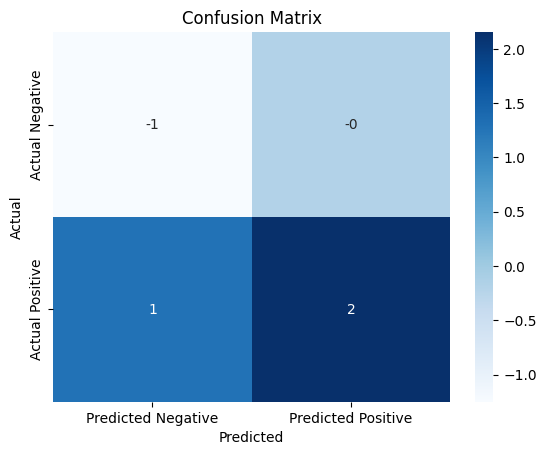

In [29]:
accuracy = efftest[1]
recall =efftest[3]
precision =efftest[2]


tp = recall * (accuracy + 1) / (precision + recall - 1)
fp = precision * (accuracy + 1) / (precision + recall - 1) - tp
tn = accuracy - tp
fn = 1 - recall - tn
conf_matrix = [[tn, fp],
               [fn, tp]]
f1_scoree = 2 * (precision * recall) / (precision + recall)
print('Dice Score is ',f1_scoree)
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

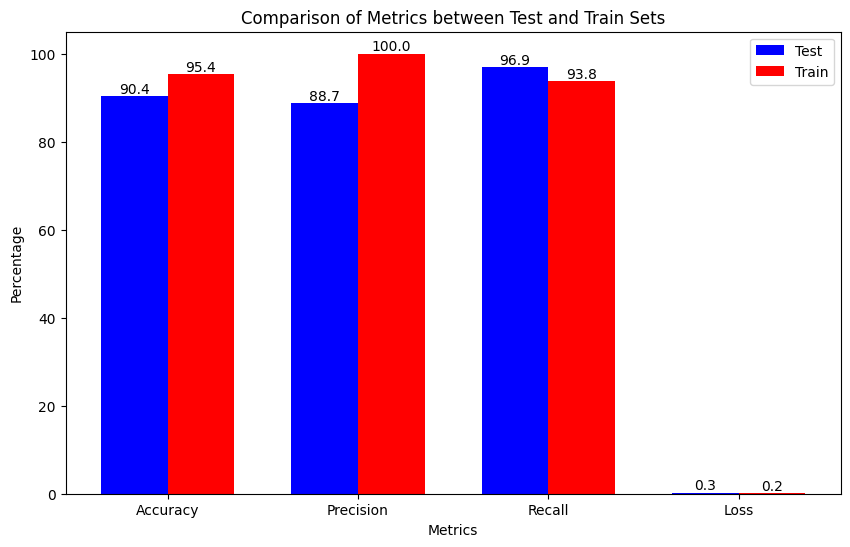

In [30]:
metrics = ['Accuracy', 'Precision', 'Recall', 'Loss']
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [etesta, etestp, etestr, etestl], width, label='Test', color='b')
rects2 = ax.bar(x + width/2, [etraina, etrainp, etrainr, etrainl], width, label='Train', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Metrics between Test and Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')

plt.show()

In [31]:
K.clear_session()

## VGG16 

In [32]:
vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [33]:
 vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [35]:
vgg = vgg16_model.fit(train,
          epochs=15,
          validation_data=validation,
          class_weight=class_weight)

Epoch 1/15
652/652 [==============================] - 170s 253ms/step - loss: 0.1671 - accuracy: 0.8073 - precision: 0.9473 - recall: 0.7843 - val_loss: 0.8030 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/15
652/652 [==============================] - 164s 252ms/step - loss: 0.1219 - accuracy: 0.8618 - precision: 0.9617 - recall: 0.8477 - val_loss: 0.5009 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 3/15
652/652 [==============================] - 163s 251ms/step - loss: 0.1220 - accuracy: 0.8604 - precision: 0.9629 - recall: 0.8446 - val_loss: 0.4906 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 4/15
652/652 [==============================] - 163s 250ms/step - loss: 0.1151 - accuracy: 0.8788 - precision: 0.9661 - recall: 0.8674 - val_loss: 0.2936 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 5/15
652/652 [==============================] - 163s 250ms/step - loss: 0.1139 - a

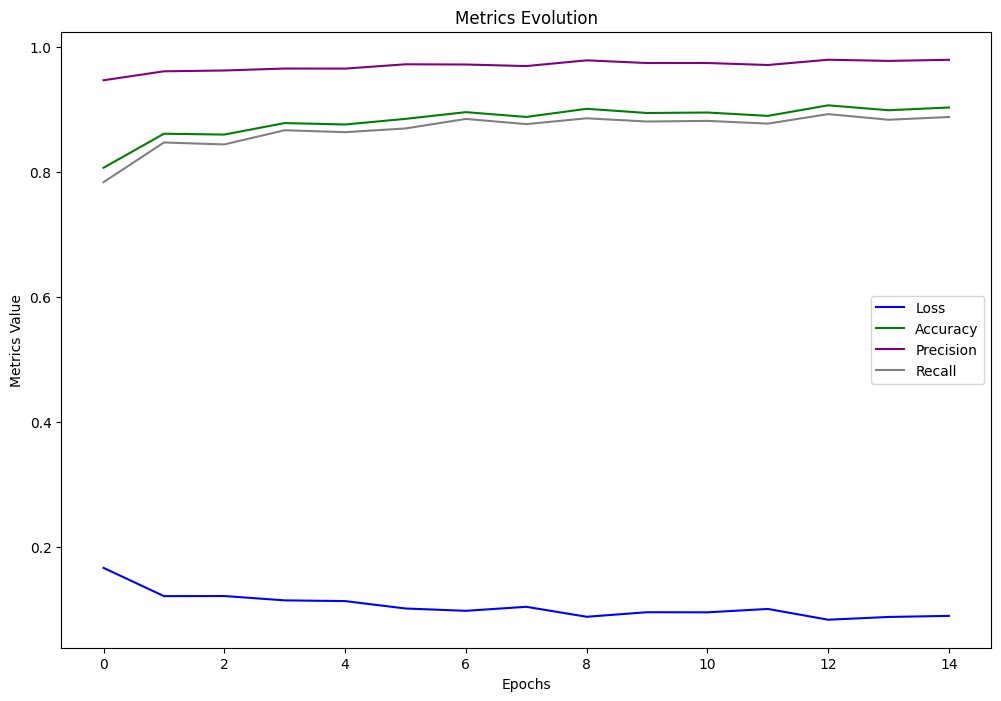

In [36]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 8))


plt.plot(vgg.history['loss'], label='Loss', color='blue')


plt.plot(vgg.history['accuracy'], label='Accuracy', color='green')



plt.plot(vgg.history['precision'], label='Precision', color='purple')


# Plotting Recall
plt.plot(vgg.history['recall'], label='Recall', color='gray')


plt.legend()
plt.title('Metrics Evolution')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()


In [37]:
vtest =vgg16_model.evaluate(test)

vtesta=vtest[1] * 100
vtestp=vtest[2] * 100 
vtestr=vtest[3] * 100 
vtestl=vtest[0] 
print("Test Accuracy:", vtesta,"%")
print("Precision:", vtestp,"%")
print("Recall:", vtestr,"%")
print("Loss Value:", vtestl)


vtrain = vgg16_model.evaluate(train)
vtraina=vtrain[1] * 100
vtrainp=vtrain[2] * 100 
vtrainr=vtrain[3] * 100 
vtrainl=vtrain[0]
print("Train Accuracy:", vtraina,"%")
print("Precision:", vtrainp,"%")
print("Recall:", vtrainr,"%")
print("Loss Value:", vtrainl)

78/78 [==============================] - 7s 88ms/step - loss: 0.9125 - accuracy: 0.6763 - precision: 0.6588 - recall: 1.0000
Test Accuracy: 67.62820482254028 %
Precision: 65.87837934494019 %
Recall: 100.0 %
Loss Value: 0.9125068783760071
652/652 [==============================] - 58s 89ms/step - loss: 0.1569 - accuracy: 0.9440 - precision: 0.9328 - recall: 0.9964
Train Accuracy: 94.40184235572815 %
Precision: 93.28340291976929 %
Recall: 99.63871240615845 %
Loss Value: 0.1568686068058014


Dice Score is  0.7942973593677045


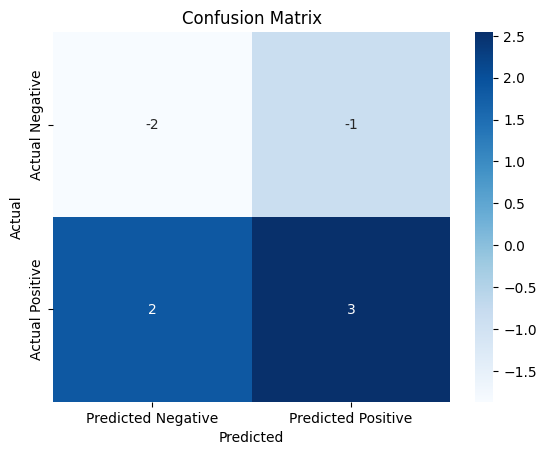

In [38]:
accuracy = vtest[1]
recall =vtest[3]
precision =vtest[2]


tp = recall * (accuracy + 1) / (precision + recall - 1)
fp = precision * (accuracy + 1) / (precision + recall - 1) - tp
tn = accuracy - tp
fn = 1 - recall - tn
conf_matrix = [[tn, fp],
               [fn, tp]]
f1_scorev = 2 * (precision * recall) / (precision + recall)
print('Dice Score is ',f1_scorev)
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

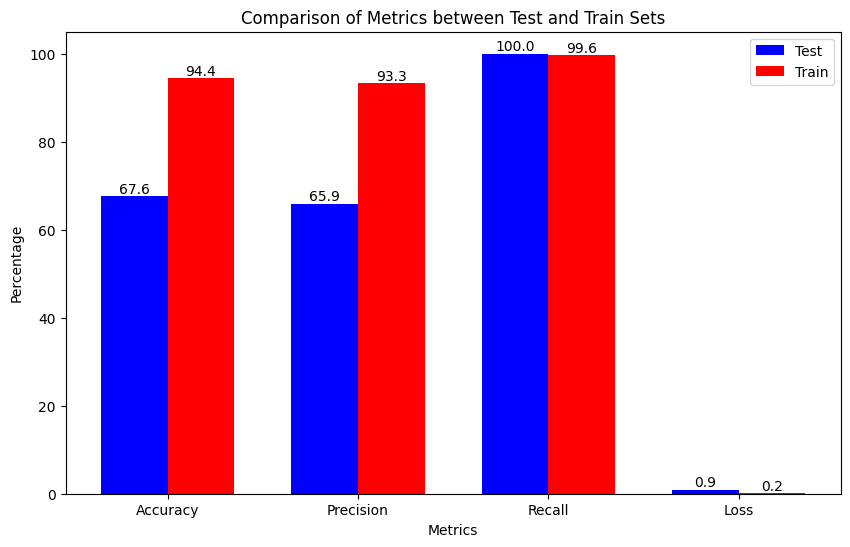

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [vtesta, vtestp, vtestr, vtestl], width, label='Test', color='b')
rects2 = ax.bar(x + width/2, [vtraina, vtrainp, vtrainr, vtrainl], width, label='Train', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Metrics between Test and Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')

plt.show()

In [40]:
K.clear_session()

## InceptionV3 

In [41]:
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

inceptionv3_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [42]:
 inceptionv3_model = tf.keras.Sequential([
        inceptionv3_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [43]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inceptionv3_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [44]:
icp = inceptionv3_model.fit(train,
         epochs=15,
          validation_data=validation,
          class_weight=class_weight)

Epoch 1/15
652/652 [==============================] - 115s 160ms/step - loss: 0.1496 - accuracy: 0.8374 - precision: 0.9538 - recall: 0.8209 - val_loss: 0.3760 - val_accuracy: 0.9375 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 2/15
652/652 [==============================] - 102s 157ms/step - loss: 0.0903 - accuracy: 0.9179 - precision: 0.9770 - recall: 0.9110 - val_loss: 0.7388 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/15
652/652 [==============================] - 103s 158ms/step - loss: 0.0876 - accuracy: 0.9189 - precision: 0.9797 - recall: 0.9097 - val_loss: 0.7604 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/15
652/652 [==============================] - 103s 158ms/step - loss: 0.0793 - accuracy: 0.9254 - precision: 0.9847 - recall: 0.9138 - val_loss: 0.1464 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/15
652/652 [==============================] - 103s 158ms/step - loss: 0.0687 - a

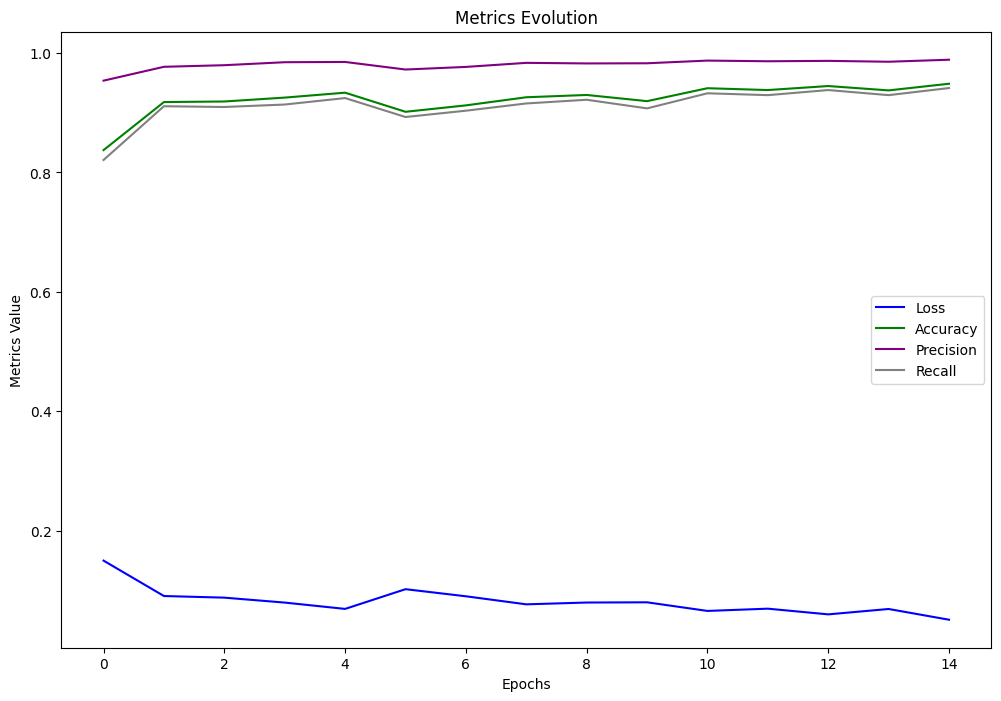

In [45]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(icp.history['loss'], label='Loss', color='blue')


plt.plot(icp.history['accuracy'], label='Accuracy', color='green')


plt.plot(icp.history['precision'], label='Precision', color='purple')


plt.plot(icp.history['recall'], label='Recall', color='gray')


plt.legend()
plt.title('Metrics Evolution')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()


In [46]:
itest =inceptionv3_model.evaluate(test)

itesta=itest[1] * 100
itestp=itest[2] * 100 
itestr=itest[3] * 100 
itestl=itest[0]
print("Test Accuracy:", itesta,"%")
print("Precision:", itestp,"%")
print("Recall:", itestr,"%")
print("Loss Value:", itestl)


itrain = inceptionv3_model.evaluate(train)

itraina=itrain[1] * 100
itrainp=itrain[2] * 100 
itrainr=itrain[3] * 100 
itrainl=itrain[0] 
print("Train Accuracy:", itraina,"%")
print("Precision:", itrainp,"%")
print("Recall:", itrainr,"%")
print("Loss Value:", itrainl)

78/78 [==============================] - 6s 75ms/step - loss: 0.5309 - accuracy: 0.7821 - precision: 0.7452 - recall: 0.9897
Test Accuracy: 78.20512652397156 %
Precision: 74.51737523078918 %
Recall: 98.97435903549194 %
Loss Value: 0.5308972001075745
652/652 [==============================] - 51s 79ms/step - loss: 0.0818 - accuracy: 0.9843 - precision: 0.9907 - recall: 0.9881
Train Accuracy: 98.42791557312012 %
Precision: 99.06856417655945 %
Recall: 98.81290197372437 %
Loss Value: 0.08177641779184341


Dice Score is  0.850220269186395


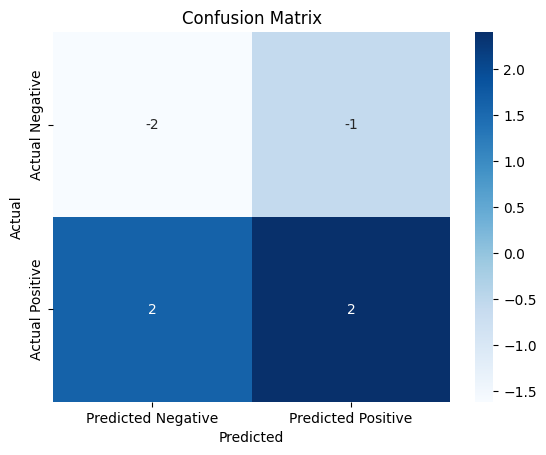

In [47]:
accuracy = itest[1]
recall =itest[3]
precision =itest[2]


tp = recall * (accuracy + 1) / (precision + recall - 1)
fp = precision * (accuracy + 1) / (precision + recall - 1) - tp
tn = accuracy - tp
fn = 1 - recall - tn
conf_matrix = [[tn, fp],
               [fn, tp]]
f1_scorei = 2 * (precision * recall) / (precision + recall)
print('Dice Score is ',f1_scorei)
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

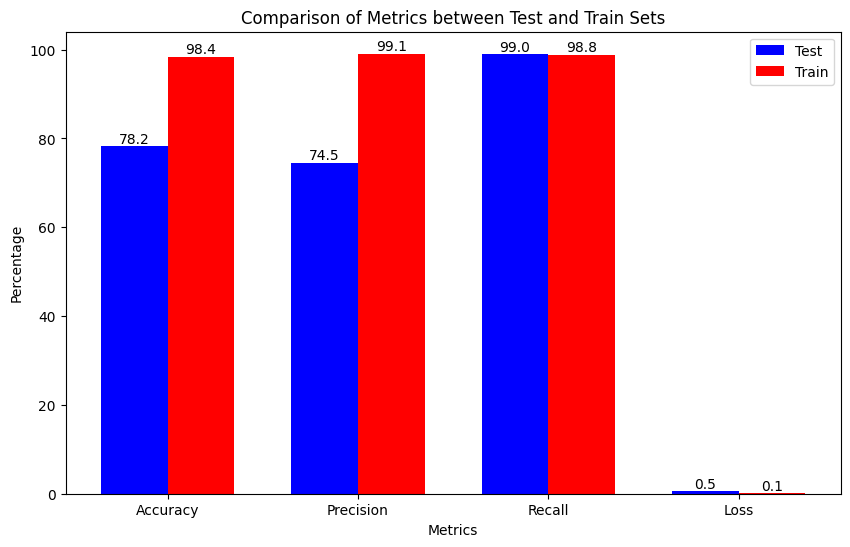

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [itesta, itestp, itestr, itestl], width, label='Test', color='b')
rects2 = ax.bar(x + width/2, [itraina, itrainp, itrainr, itrainl], width, label='Train', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Metrics between Test and Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')

plt.show()

In [49]:
K.clear_session()

## DenseNet121

In [50]:

densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

densenet_model.summary()


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1/conv[0][0]']   

In [51]:
 densenet_model = tf.keras.Sequential([
        densenet_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
densenet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [53]:
dnm = densenet_model.fit(train,
          epochs=15,
          validation_data=validation,
          class_weight=class_weight)

Epoch 1/15
652/652 [==============================] - 135s 182ms/step - loss: 0.1260 - accuracy: 0.8562 - precision: 0.9611 - recall: 0.8405 - val_loss: 0.8872 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 2/15
652/652 [==============================] - 116s 178ms/step - loss: 0.1123 - accuracy: 0.8829 - precision: 0.9623 - recall: 0.8766 - val_loss: 0.7194 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 3/15
652/652 [==============================] - 116s 178ms/step - loss: 0.0906 - accuracy: 0.9120 - precision: 0.9729 - recall: 0.9068 - val_loss: 2.3447 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/15
652/652 [==============================] - 116s 178ms/step - loss: 0.0840 - accuracy: 0.9143 - precision: 0.9780 - recall: 0.9050 - val_loss: 1.7785 - val_accuracy: 0.5625 - val_precision: 1.0000 - val_recall: 0.1250
Epoch 5/15
652/652 [==============================] - 116s 178ms/step - loss: 0.0870 - a

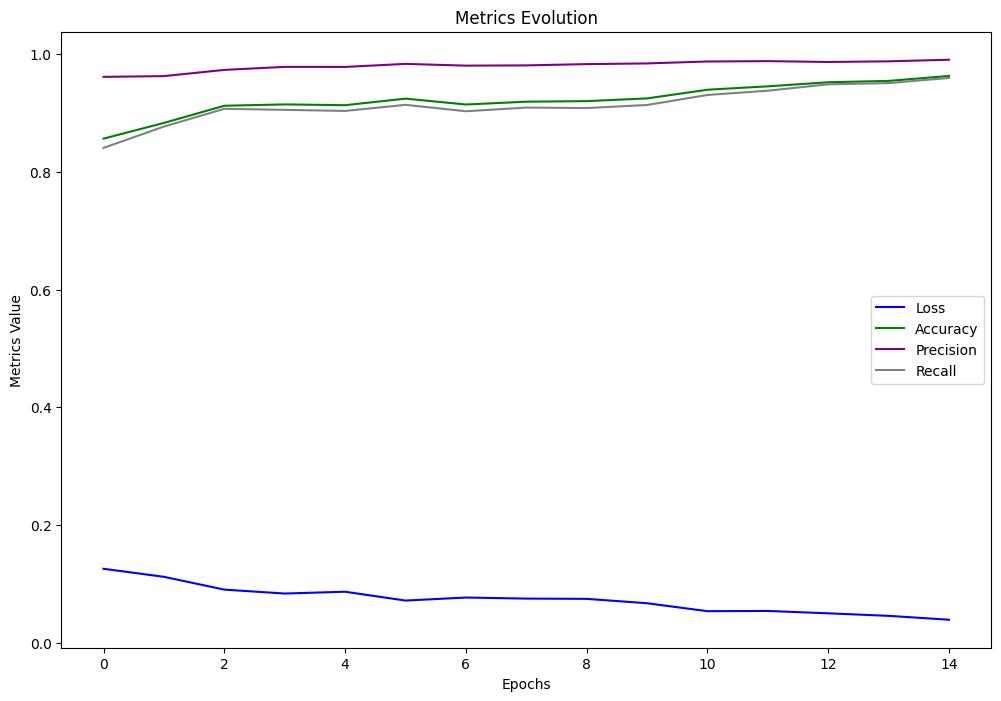

In [54]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(dnm.history['loss'], label='Loss', color='blue')


plt.plot(dnm.history['accuracy'], label='Accuracy', color='green')


plt.plot(dnm.history['precision'], label='Precision', color='purple')


plt.plot(dnm.history['recall'], label='Recall', color='gray')


plt.legend()
plt.title('Metrics Evolution')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()


In [55]:
dtest =densenet_model.evaluate(test)



dtesta=dtest[1] * 100
dtestp=dtest[2] * 100 
dtestr=dtest[3] * 100 
dtestl=dtest[0] 
print("Test Accuracy:", dtesta,"%")
print("Precision:", dtestp,"%")
print("Recall:", dtestr,"%")
print("Loss Value:", dtestl)


dtrain = densenet_model.evaluate(train)

dtraina=dtrain[1] * 100
dtrainp=dtrain[2] * 100 
dtrainr=dtrain[3] * 100 
dtrainl=dtrain[0]
print("Train Accuracy:", dtraina,"%")
print("Precision:", dtrainp,"%")
print("Recall:", dtrainr,"%")
print("Loss Value:", dtrainl)

78/78 [==============================] - 6s 75ms/step - loss: 0.4080 - accuracy: 0.8750 - precision: 0.8362 - recall: 0.9949
Test Accuracy: 87.5 %
Precision: 83.62069129943848 %
Recall: 99.48717951774597 %
Loss Value: 0.4079977571964264
652/652 [==============================] - 52s 79ms/step - loss: 0.0759 - accuracy: 0.9739 - precision: 0.9984 - recall: 0.9665
Train Accuracy: 97.39263653755188 %
Precision: 99.84004497528076 %
Recall: 96.64515852928162 %
Loss Value: 0.07589134573936462


Dice Score is  0.9086651152217438


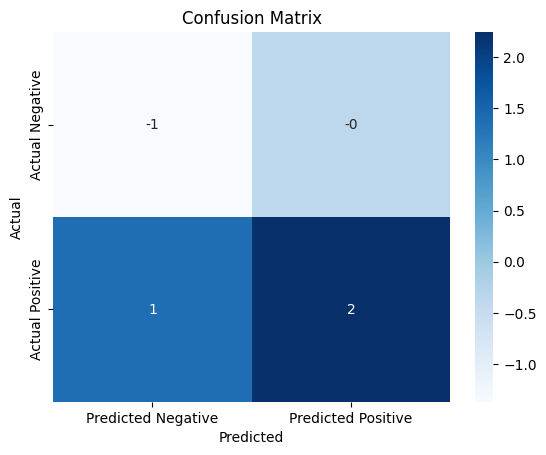

In [56]:
accuracy = dtest[1]
recall =dtest[3]
precision =dtest[2]


tp = recall * (accuracy + 1) / (precision + recall - 1)
fp = precision * (accuracy + 1) / (precision + recall - 1) - tp
tn = accuracy - tp
fn = 1 - recall - tn
conf_matrix = [[tn, fp],
               [fn, tp]]
f1_scored = 2 * (precision * recall) / (precision + recall)
print('Dice Score is ',f1_scored)
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

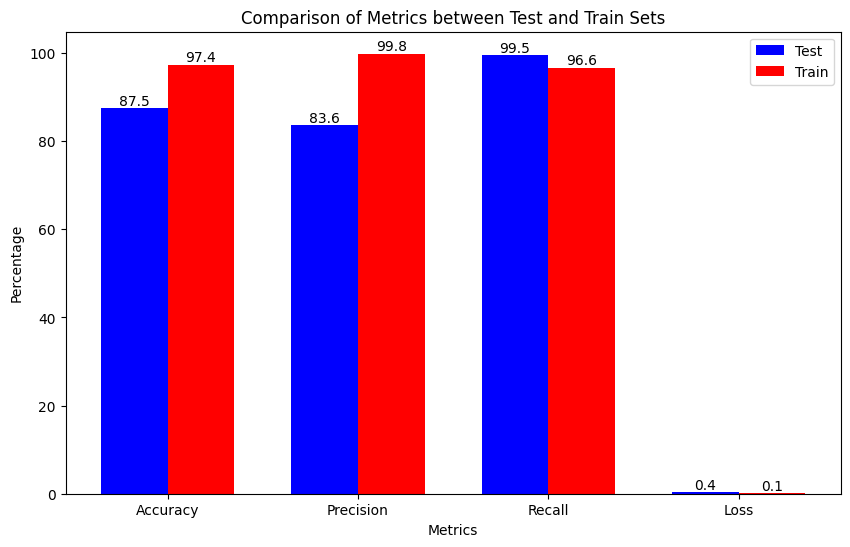

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [dtesta, dtestp, dtestr, dtestl], width, label='Test', color='b')
rects2 = ax.bar(x + width/2, [dtraina, dtrainp, dtrainr, dtrainl], width, label='Train', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Metrics between Test and Train Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height, '%.1f' % height,
            ha='center', va='bottom')

plt.show()

In [58]:
K.clear_session()

# Results Evaluation

In [59]:

model_names = ['Resnet', 'EfficientNet', 'VGG', 'Inception','DenseNet']
accuracies = [rtesta,etesta,vtesta,itesta,dtesta]
precisions = [rtestp,etestp,vtestp,itestp,dtestp]
dices = [f1_scorer,f1_scoree,f1_scorev,f1_scorei,f1_scored]
recalls = [rtestr,etestr,vtestr,itestr,dtestr]

data = {'Model': model_names, 'Accuracy': accuracies, 'Precision': precisions, 'Dice Score':dices, 'Recall': recalls}
table = pd.DataFrame(data)


print(table)


          Model   Accuracy  Precision  Dice Score      Recall
0        Resnet  79.807693  76.720649    0.857466   97.179484
1  EfficientNet  90.384614  88.732392    0.926471   96.923077
2           VGG  67.628205  65.878379    0.794297  100.000000
3     Inception  78.205127  74.517375    0.850220   98.974359
4      DenseNet  87.500000  83.620691    0.908665   99.487180


In [60]:
K.clear_session()

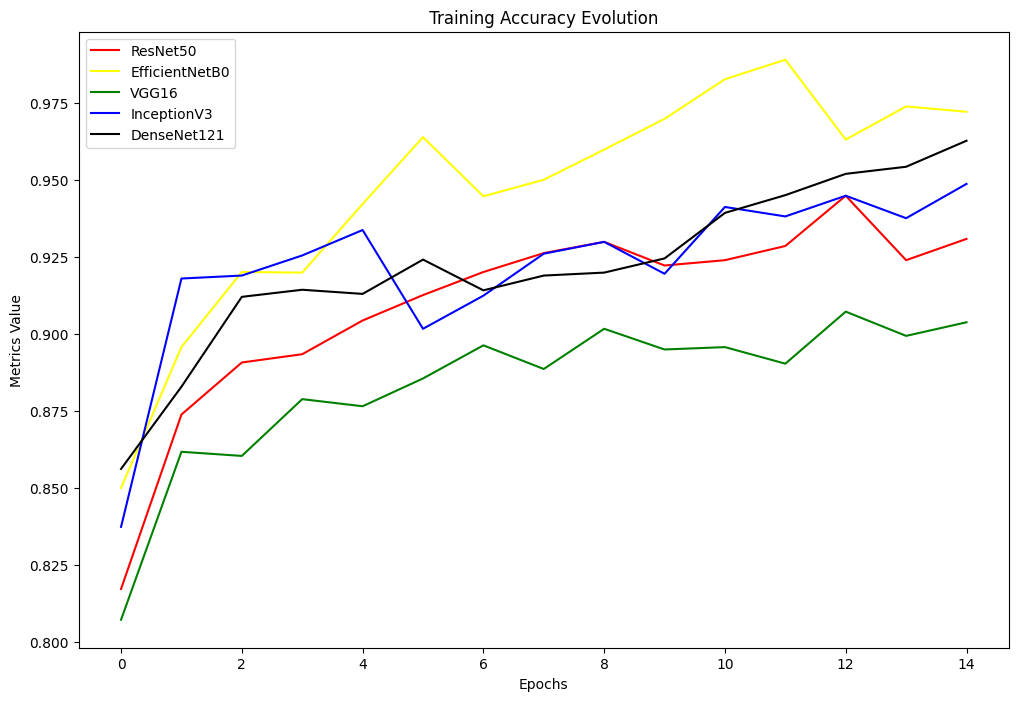

In [61]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(r.history['accuracy'], label='ResNet50', color='red')

plt.plot(e.history['accuracy'], label='EfficientNetB0', color='yellow')

plt.plot(vgg.history['accuracy'], label='VGG16', color='green')

plt.plot(icp.history['accuracy'], label='InceptionV3', color='blue')

plt.plot(dnm.history['accuracy'], label='DenseNet121', color='black')


plt.legend()
plt.title(' Training Accuracy Evolution ')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

plt.show()
